# Exploratory Data Analysis

### Adding project path to system path

In [1]:
import pandas as pd
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

### Import modules

In [2]:
from script.Fraud_data_preprocessing import FraudDataPreprocessing

In [3]:
preprocessecor=FraudDataPreprocessing()

In [5]:
data={
    "age": 25,
    "browser": "chrome",
    "country": "canada",
    "device_id": "ABC123",
    "purchase_time": "2024-10-01 12:30:00",
    "purchase_value": 50.0,
    "sex": "M",
    "signup_time": "2024-10-01 12:00:00",
    "source": "Direct",
    "user_id": "123"
}

In [6]:
df = pd.DataFrame([data])

In [7]:
df

,age,browser,country,device_id,purchase_time,purchase_value,sex,signup_time,source,user_id
0,25,chrome,canada,ABC123,2024-10-01 12:30:00,50.0,M,2024-10-01 12:00:00,Direct,123


In [10]:
from sklearn.preprocessing import OneHotEncoder

def preprocess_input_rf(data):
    # Convert JSON data to DataFrame
    df = pd.DataFrame([data])
    #process the data
    feat_engineered=preprocessecor.feature_engineering(df)
    normalized=preprocessecor.normalize_scale_features(feat_engineered)
    all_possible_values = {
    'source': ['Ads', 'Direct', 'SEO'],
    'browser': ['Chrome', 'FireFox', 'IE', 'Opera', 'Safari'],
    'sex': ['F', 'M']
        }
    # One-hot encode `source`, `browser`, and `sex` using predefined categories
    one_hot_encoder = OneHotEncoder(categories=[all_possible_values['source'],
                                                all_possible_values['browser'],
                                                all_possible_values['sex']],
                                    drop=None, sparse_output=False, handle_unknown='ignore')
    one_hot_encoded = one_hot_encoder.fit_transform(selected_features[['source', 'browser', 'sex']])

    # Get feature names from the encoder and create a DataFrame
    one_hot_columns = one_hot_encoder.get_feature_names_out(['source', 'browser', 'sex'])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns, index=input_data.index)
    # encoded=preprocessecor.one_hot_encode(normalized)
    processed=preprocessecor.frequency_encode_country(encoded)    
    X_data = processed.drop(['user_id', 'signup_time', 'purchase_time','device_id'],axis = 1)
     
    return X_data

processed_data = preprocess_input_rf(data)

In [11]:
processed_data.columns

Index(['age', 'purchase_value', 'transaction_count', 'hour_of_day',
       'day_of_week', 'source_Direct', 'browser_chrome', 'sex_M',
       'country_encoded'],
      dtype='object')

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def preprocess_data(input_data):
    # Ensure datetime columns are in datetime format
    input_data['purchase_time'] = pd.to_datetime(input_data['purchase_time'])
    input_data['signup_time'] = pd.to_datetime(input_data['signup_time'])
    
    # Add `hour_of_day` and `day_of_week` features
    input_data['hour_of_day'] = input_data['purchase_time'].dt.hour
    input_data['day_of_week'] = input_data['purchase_time'].dt.dayofweek

    # Assume `transaction_count` is 1 for each row if unknown
    input_data['transaction_count'] = 1

    # Select columns of interest
    selected_features = input_data[['purchase_value', 'age', 'transaction_count', 'hour_of_day', 'day_of_week',
                                    'source', 'browser', 'sex', 'country']]
    
    # Manually specify all possible categories for one-hot encoding
    all_possible_values = {
        'source': ['Ads', 'Direct', 'SEO'],
        'browser': ['Chrome', 'FireFox', 'IE', 'Opera', 'Safari'],
        'sex': ['F', 'M']
    }

    # One-hot encode `source`, `browser`, and `sex` using predefined categories
    one_hot_encoder = OneHotEncoder(categories=[all_possible_values['source'],
                                                all_possible_values['browser'],
                                                all_possible_values['sex']],
                                    drop=None, sparse_output=False, handle_unknown='ignore')
    one_hot_encoded = one_hot_encoder.fit_transform(selected_features[['source', 'browser', 'sex']])

    # Get feature names from the encoder and create a DataFrame
    one_hot_columns = one_hot_encoder.get_feature_names_out(['source', 'browser', 'sex'])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns, index=input_data.index)
    
    # Concatenate one-hot encoded columns with the selected features
    preprocessed_data = pd.concat([selected_features.drop(columns=['source', 'browser', 'sex']), one_hot_df], axis=1)
    
    # Label encode `country`
    label_encoder = LabelEncoder()
    preprocessed_data['country_encoded'] = label_encoder.fit_transform(selected_features['country'])
    
    # Return final transformed data
    return preprocessed_data

# Example usage with a single row of data
# data = {
#     'age': [25],
#     'browser': ['Chrome'],
#     'country': ['Canada'],
#     'device_id': ['ABC123'],
#     'purchase_time': ['2024-10-01 12:30:00'],
#     'purchase_value': [50.0],
#     'sex': ['M'],
#     'signup_time': ['2024-10-01 12:00:00'],
#     'source': ['Direct'],
#     'user_id': ['123']
# }
data={
    "age": 25,
    "browser": "Chrome",
    "country": "canada",
    "device_id": "ABC123",
    "purchase_time": "2024-10-01 12:30:00",
    "purchase_value": 50.0,
    "sex": "M",
    "signup_time": "2024-10-01 12:00:00",
    "source": "Direct",
    "user_id": "123"
}
input_df = pd.DataFrame(data)
input_df

# processed_df = preprocess_data(input_df)
# processed_df


,age,browser,country,device_id,purchase_time,purchase_value,sex,signup_time,source,user_id
0,25,Chrome,Canada,ABC123,2024-10-01 12:30:00,50.0,M,2024-10-01 12:00:00,Direct,123


In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def preprocess_data(data):
    # Convert the input dictionary to a DataFrame
    input_data = pd.DataFrame([data])

    # Ensure datetime columns are in datetime format
    input_data['purchase_time'] = pd.to_datetime(input_data['purchase_time'])
    input_data['signup_time'] = pd.to_datetime(input_data['signup_time'])
    
    # Add `hour_of_day` and `day_of_week` features
    input_data['hour_of_day'] = input_data['purchase_time'].dt.hour
    input_data['day_of_week'] = input_data['purchase_time'].dt.dayofweek

    # Assume `transaction_count` is 1 for each row if unknown
    input_data['transaction_count'] = 1

    # Select columns of interest
    selected_features = input_data[['purchase_value', 'age', 'transaction_count', 'hour_of_day', 'day_of_week',
                                    'source', 'browser', 'sex', 'country']]
    
    # Manually specify all possible categories for one-hot encoding
    all_possible_values = {
        'source': ['Ads', 'Direct', 'SEO'],
        'browser': ['Chrome', 'FireFox', 'IE', 'Opera', 'Safari'],
        'sex': ['F', 'M']
    }

    # One-hot encode `source`, `browser`, and `sex` using predefined categories
    one_hot_encoder = OneHotEncoder(categories=[all_possible_values['source'],
                                                all_possible_values['browser'],
                                                all_possible_values['sex']],
                                    drop=None, sparse_output=False, handle_unknown='ignore')
    one_hot_encoded = one_hot_encoder.fit_transform(selected_features[['source', 'browser', 'sex']])

    # Get feature names from the encoder and create a DataFrame
    one_hot_columns = one_hot_encoder.get_feature_names_out(['source', 'browser', 'sex'])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns, index=input_data.index)
    
    # Concatenate one-hot encoded columns with the selected features
    preprocessed_data = pd.concat([selected_features.drop(columns=['source', 'browser', 'sex']), one_hot_df], axis=1)
    
    # Label encode `country`
    label_encoder = LabelEncoder()
    preprocessed_data['country_encoded'] = label_encoder.fit_transform(selected_features['country'])
    
    # Return final transformed data
    return preprocessed_data

# Example usage with a single row of data as dictionary
data = {
    "age": 25,
    "browser": "Chrome",
    "country": "Canada",
    "device_id": "ABC123",
    "purchase_time": "2024-10-01 12:30:00",
    "purchase_value": 50.0,
    "sex": "M",
    "signup_time": "2024-10-01 12:00:00",
    "source": "Direct",
    "user_id": "123"
}

processed_df = preprocess_data(data)
processed_df


,purchase_value,age,transaction_count,hour_of_day,day_of_week,country,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,country_encoded
0,50.0,25,1,12,1,Canada,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


### Instantce of the class

In [3]:
preprocessing=FraudDataPreprocessing()

### Load data sets

In [4]:
fraud_data,ip_country_data,creditcard_data=preprocessing.load_data()
fraud_data.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
ip_country_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Overview

In [7]:
preprocessing.data_overview(fraud_data)

Number of rows:151112
Number of columns:11
Data types of each column:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object


In [8]:
preprocessing.data_overview(ip_country_data)

Number of rows:138846
Number of columns:3
Data types of each column:
lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object


In [9]:
preprocessing.data_overview(creditcard_data)

Number of rows:284807
Number of columns:31
Data types of each column:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


## Check missing data

In [10]:
preprocessing.check_missing(fraud_data)

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [11]:
preprocessing.check_missing(ip_country_data)

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [12]:
preprocessing.check_missing(creditcard_data)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Implication**

There is no missing data in all the fraud dataset ,credit card dataset and country ip dataset.

## Cleaning data

In [13]:
preprocessing.data_cleaning(fraud_data)

Duplicates are removed from fraud data!
Timestamps are converted!


## Exploratory Data Analysis (EDA)

* Univariate analysis
* Bivariate analysis


### Univariate Analysis

In [14]:
preprocessing.summarize_dataset(fraud_data,['purchase_value'])

,Mean,Median,Mode,Standard Deviation,Variance,Range,IQR,Skewness,Kurtosis
purchase_value,36.935372,35.0,28,18.322762,335.723613,145,27.0,0.670485,0.138292


In [15]:
preprocessing.summarize_dataset(creditcard_data,['Amount'])

,Mean,Median,Mode,Standard Deviation,Variance,Range,IQR,Skewness,Kurtosis
Amount,88.349619,22.0,1.0,250.120109,62560.069046,25691.16,71.565,16.977724,845.092646


### Plot Catagorical features frequency Distribution

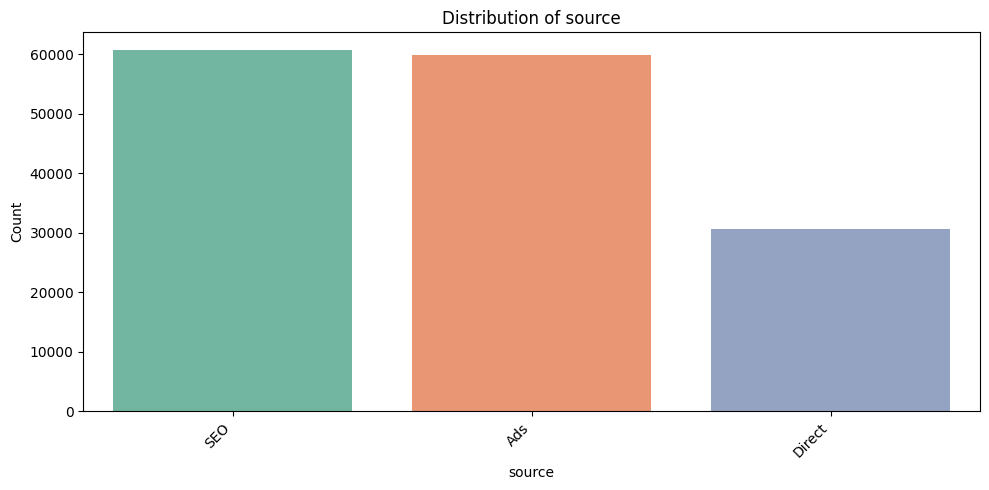

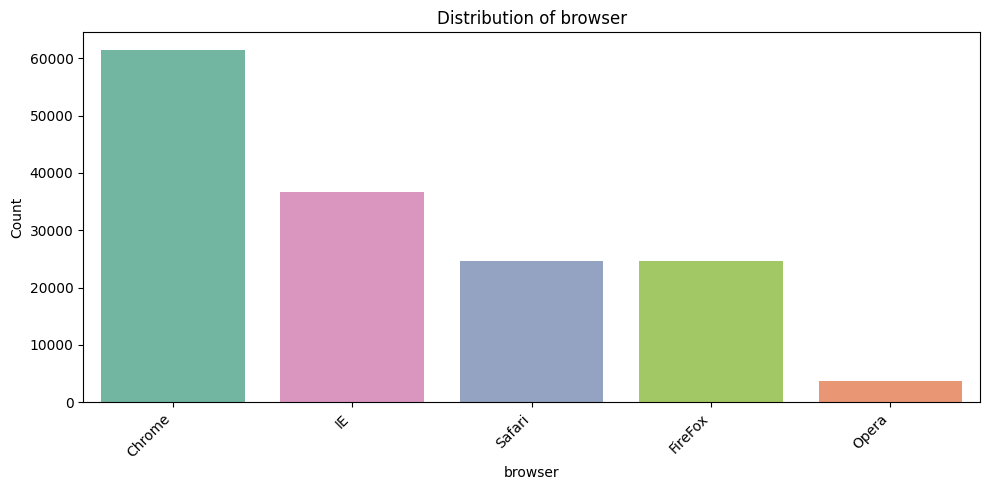

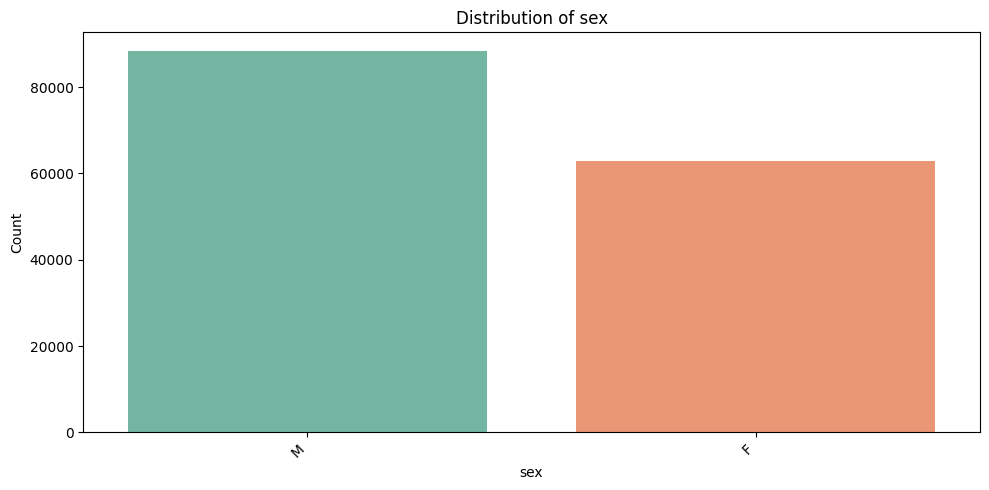

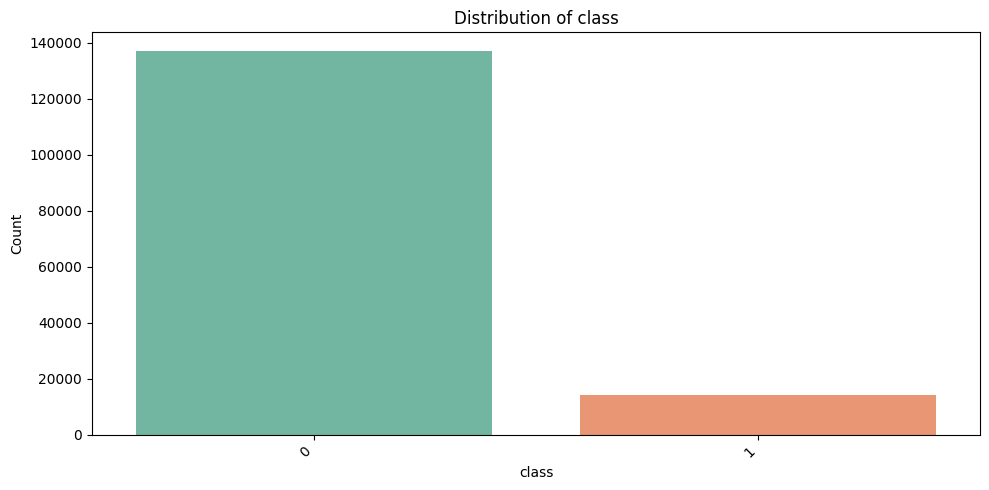

In [16]:
preprocessing.plot_univariate(fraud_data)

### Bivariate Analysis

Correlation between fraud and catagorical variables.

**Cramér's V Correlation between 'source' and 'class'**

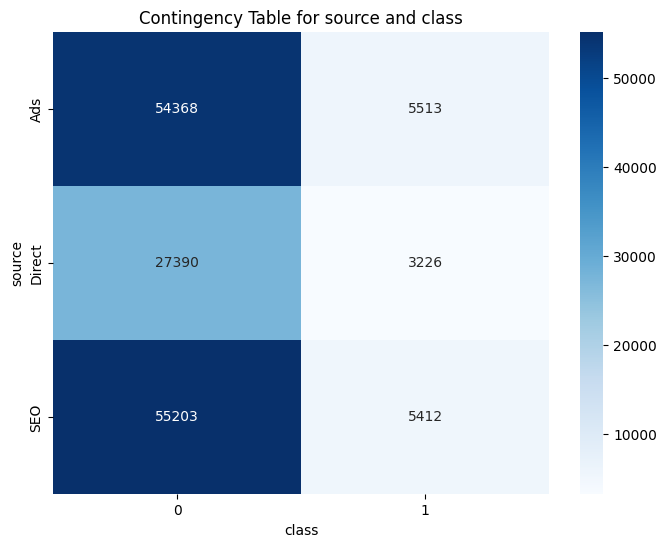

Cramér's V correlation between source and class: 0.020727666162226325


In [17]:
# 'source','browser','sex','class'
preprocessing.cramers_v(fraud_data,'source','class')

**Cramér's V Correlation between 'browser' and 'class'**

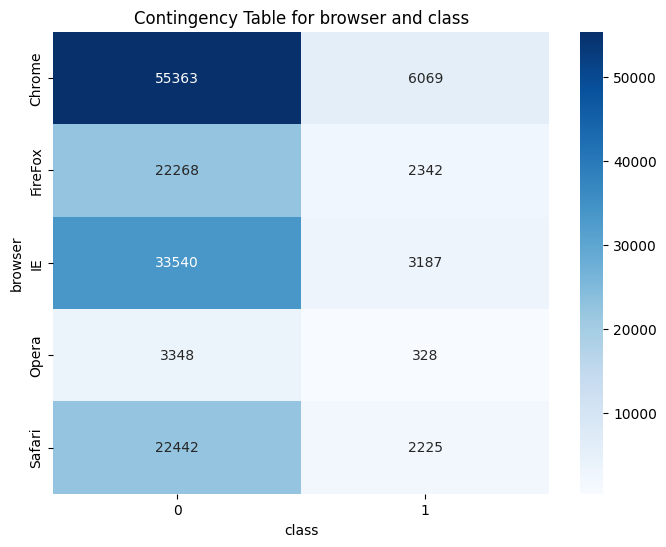

Cramér's V correlation between browser and class: 0.017171427763370384


In [18]:
preprocessing.cramers_v(fraud_data,'browser','class')

**Cramér's V Correlation between 'sex' and 'class'**

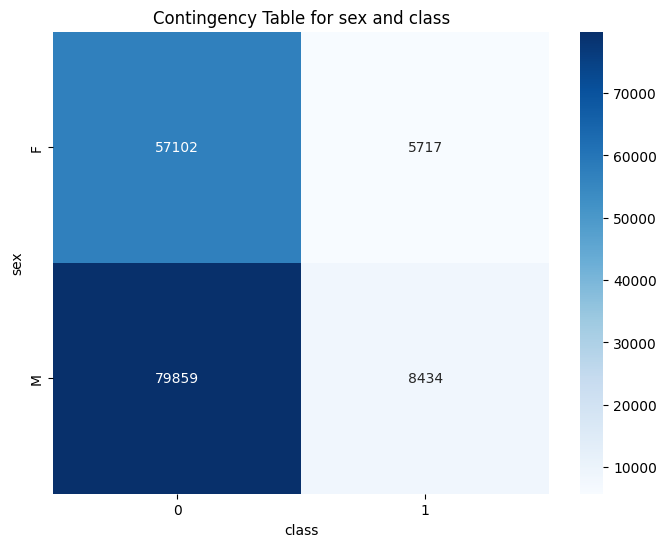

Cramér's V correlation between sex and class: 0.007615477801450197


In [19]:
preprocessing.cramers_v(fraud_data,'sex','class')

**Interpretation**
1. Cramér's V correlation between source and class: **0.0207**

This is a **very low correlation**.
Interpretation: The source through which users come to the site (e.g., SEO, Ads) has a minimal association with whether a transaction is fraudulent or not. The source variable does not provide significant predictive power for detecting fraud in this dataset.

2. Cramér's V correlation between browser and class: **0.0172**

This is also a **very low correlation**.
Interpretation: The browser used to make a transaction (e.g., Chrome, Safari) has almost no association with whether a transaction is fraudulent. Similar to source, the browser variable is not likely to be helpful in identifying fraud.

3. Cramér's V correlation between sex and class: **0.0076**

This is the **lowest correlation among the three variables**.
Interpretation: The gender of the user (M for male, F for female) has virtually no association with whether a transaction is fraudulent. The sex variable contributes almost nothing to the fraud detection model based on the correlation. 

## Merge Datasets for Geolocation Analysis

* Convert IP addresses to integer format
* Merge Fraud_Data.csv with IpAddress_to_Country.csv


In [20]:
# merged_data=preprocessing.merge_fraud_with_ip(fraud_data,ip_country_data)
# merged_data.head()

In [21]:
# merged_data.to_csv('Data/merged_data.csv', index=True)

In [22]:
merged_data=pd.read_csv("Data/merged_data.csv")
merged_data.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,NaN
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


### Drop rows that have invalid ip (null value of 'country')

In [23]:
merged_data=preprocessing.drop_null_country(merged_data)
merged_data.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States
5,5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2809315199,0,Canada


## Feature Engineering
* Transaction frequency and velocity for Fraud_Data.csv
* Time-Based features for Fraud_Data.csv

        i. hour_of _day
        ii. day_of_week


In [24]:
merged_data=preprocessing.feature_engineering(merged_data)
merged_data.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_count,hour_of_day,day_of_week
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,2,5
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,1,0
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,1,18,3
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1,18,2
5,5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2809315199,0,Canada,1,8,3


## Normalization and Scaling
To prepare the data for model training normalizing and scaling is neccesary. **'purchase_value'** and **'transaction_count'** are normalized in our dataset.


In [25]:
merged_data=preprocessing.normalize_scale_features(merged_data)
merged_data.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_count,hour_of_day,day_of_week
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160088,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,0.0,2,5
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142743,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,0.0,1,0
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197335,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,0.0,18,3
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112871,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,0.0,18,2
5,5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,0.276647,ALEYXFXINSXLZ,Ads,Chrome,M,18,2809315199,0,Canada,0.0,8,3


### Normalize credit card data

In [26]:
creditcard_data=preprocessing.normalize_scale_creditcard_data(creditcard_data)

## Encode Categorical Features

### One-Hot Encoding
In our data the catagorical features are encoded using one-hot encoding.**'source'**, **'browser'** and **'sex'** are encoded.

In [27]:
merged_data=preprocessing.one_hot_encode(merged_data)
merged_data.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,country,...,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160088,QVPSPJUOCKZAR,39,732758368,0,Japan,...,0,0,1,1,0,0,0,0,0,1
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142743,EOGFQPIZPYXFZ,53,350311387,0,United States,...,1,0,0,1,0,0,0,0,1,0
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197335,YSSKYOSJHPPLJ,53,2621473820,1,United States,...,0,0,1,0,0,0,1,0,0,1
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112871,NAUITBZFJKHWW,45,415583117,0,United States,...,1,0,0,0,0,0,0,1,0,1
5,5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,0.276647,ALEYXFXINSXLZ,18,2809315199,0,Canada,...,1,0,0,1,0,0,0,0,0,1


### Frequency Encoding
Replace each country with its frequency (the number of occurrences in the dataset).

In [28]:
merged_data=preprocessing.frequency_encode_country(merged_data)
merged_data.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,transaction_count,...,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,country_encoded
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160088,QVPSPJUOCKZAR,39,732758368,0,0.0,...,0,1,1,0,0,0,0,0,1,0.056572
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142743,EOGFQPIZPYXFZ,53,350311387,0,0.0,...,0,0,1,0,0,0,0,1,0,0.449484
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197335,YSSKYOSJHPPLJ,53,2621473820,1,0.0,...,0,1,0,0,0,1,0,0,1,0.449484
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112871,NAUITBZFJKHWW,45,415583117,0,0.0,...,0,0,0,0,0,0,1,0,1,0.449484
5,5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,0.276647,ALEYXFXINSXLZ,18,2809315199,0,0.0,...,0,0,1,0,0,0,0,0,1,0.023036


### Save the the preprocessed data

In [29]:
merged_data.to_csv('Data/preprocessed_data.csv', index=False)
creditcard_data.to_csv('Data/credit_card_preprocessed_data.csv', index=False)